In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import numpy as np
import time
import apriori

To make this example more easily reproducible, I used the sqlite version of the dataset rather than the full Hive implementation.  I did not include that database in my repo.  To retrieve it for your own study, download it via the link below.

http://labrosa.ee.columbia.edu/millionsong/pages/getting-dataset

In [2]:
conn = sqlite3.connect('artist_term.db')
lastid = ''
tagss = []
tags = []
cursor = conn.execute("SELECT * from artist_mbtag")
for row in cursor:
    id = row[0]
    tag = row[1]
    if id != lastid and len(tags) > 0:
        tagss.append(tags)
        tags = []
    lastid = id
    tags.append(tag)

tagss.append(tags)
conn.close()

In [3]:
sensitivities = np.arange(0, 50) * 0.001 + 0.001
sensitivities

array([ 0.001,  0.002,  0.003,  0.004,  0.005,  0.006,  0.007,  0.008,
        0.009,  0.01 ,  0.011,  0.012,  0.013,  0.014,  0.015,  0.016,
        0.017,  0.018,  0.019,  0.02 ,  0.021,  0.022,  0.023,  0.024,
        0.025,  0.026,  0.027,  0.028,  0.029,  0.03 ,  0.031,  0.032,
        0.033,  0.034,  0.035,  0.036,  0.037,  0.038,  0.039,  0.04 ,
        0.041,  0.042,  0.043,  0.044,  0.045,  0.046,  0.047,  0.048,
        0.049,  0.05 ])

In [5]:
tlist = []
ilist = []
for ms in sensitivities:
    start = time.time()
    ap = apriori.apriori(tagss, ms)
    end = time.time()
    tlist.append(end-start)
    ilist.append(len(ap))

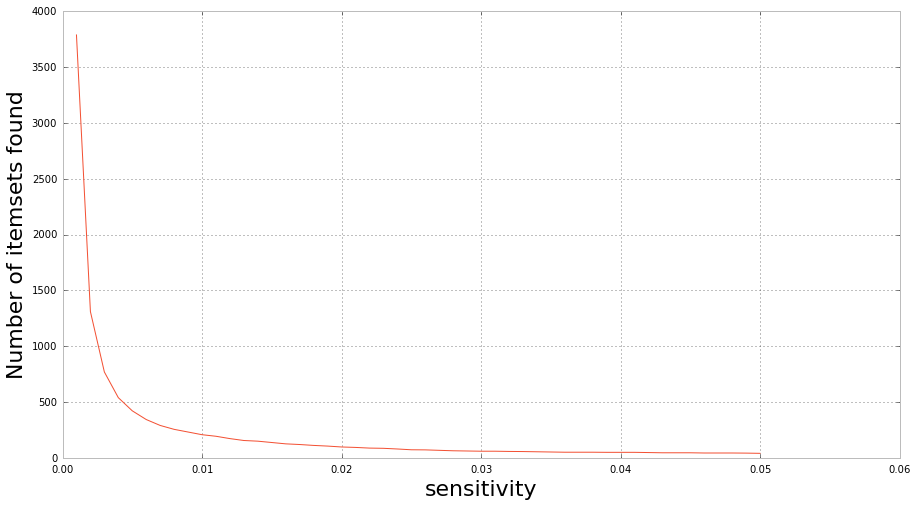

In [6]:
plt.figure(figsize=(15,8))
plt.plot(sensitivities, ilist)
plt.xlabel('sensitivity', fontsize=22)
plt.ylabel('Number of itemsets found', fontsize=22)
plt.show()

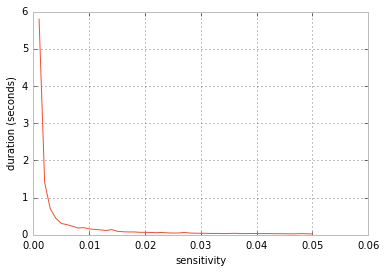

In [7]:
plt.plot(sensitivities, tlist)
plt.xlabel('sensitivity')
plt.ylabel('duration (seconds)')
plt.show()

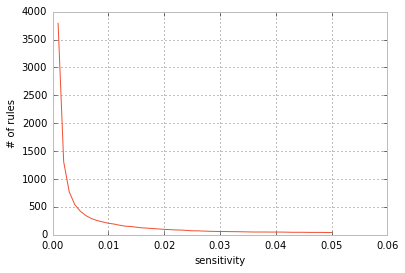

In [8]:
plt.plot(sensitivities, ilist)
plt.xlabel('sensitivity')
plt.ylabel('# of rules')
plt.show()

In [10]:
ap = apriori.apriori(tagss, 0.0005, verbose=True)

create initial: 0.00114297866821 925
Iteration # 1 1.50906610489
Iteration # 2 2.68283700943
Iteration # 3 7.12761497498
Iteration # 4 8.65211415291
Iteration # 5 4.54969096184
Iteration # 6 1.51978802681
Iteration # 7 0.267207860947
Iteration # 8 0.028263092041
Iteration # 9 0.000177145004272


In [11]:
supports = []
names = []
items = []
for a in ap:
    supports.append(a['support'])
    names.append(str(a['items']))
    items.append(len(a['items']))

df = pd.DataFrame({'support': supports, 'name': names, 'itemcount': items})

In [12]:
df.sort('support', ascending=False, inplace=True)

In [13]:
itemsets = df[df.itemcount==6].head(10)['name'].apply(lambda x: x.replace('set([', '').replace('])', '').replace("u'", '').replace("'", '')).tolist()
for itemset in itemsets:
    print itemset

classic pop and rock, english, british, pop, uk, rock
classic pop and rock, rock, british, pop, uk, english
classic pop and rock, english, pop, british, uk, rock
classic pop and rock, rock, pop, british, uk, english
classic pop and rock, english, british, uk, rock, progressive rock
classic pop and rock, rock, british, uk, english, progressive rock
alternative rock, usa, rock and indie, american, rock, am\xe9ricain
alternative rock, rock and indie, english, british, uk, rock
alternative rock, rock and indie, rock, british, uk, english
alternative rock, rock, british, uk, english, electronic


In [14]:
choice = ['trance']
supports = []
itemsets = []
confidence = []
for i in ap:
    if len(i['items'].intersection(choice)) == len(choice) and len(i['items']) > len(choice):
        itemset = list(i['items'])
        for c in choice:
            itemset.remove(c)
        supports.append(i['support'])
        itemsets.append(itemset)
        iset = set(itemset)
        for j in ap:
            if j['items'] == iset:
                denom = j['count']
        conf = 1.0 * i['count'] / denom
        confidence.append(conf)

df2 = pd.DataFrame({'support': supports, 'itemset': itemsets, 'confidence': confidence})
df2.sort('confidence', ascending=False, inplace=True)
df2 = df2[['itemset', 'support', 'confidence']]
df2

,itemset,support,confidence
5,"[electronic, european]",0.000566,0.200000
6,"[german, electronic]",0.000566,0.102041
0,[electronic],0.002942,0.062954
4,"[electronic, british]",0.000792,0.058333
2,[european],0.000679,0.025862
1,[german],0.000566,0.012920
3,[british],0.000792,0.007179
